# Módulo Python para Enseñanza del Método Newton-Raphson



"""
newton_teaching.py - Módulo educativo para el método de Newton-Raphson

Este módulo proporciona herramientas visuales y explicativas para enseñar el método 
de Newton-Raphson para encontrar raíces de funciones, mostrando:
- Gráficos iterativos del proceso
- Descripciones verbales detalladas
- Tablas con valores numéricos
- Código de ejemplo

Funciones principales:
- newton_raphson_analysis: Realiza y muestra un análisis completo del método


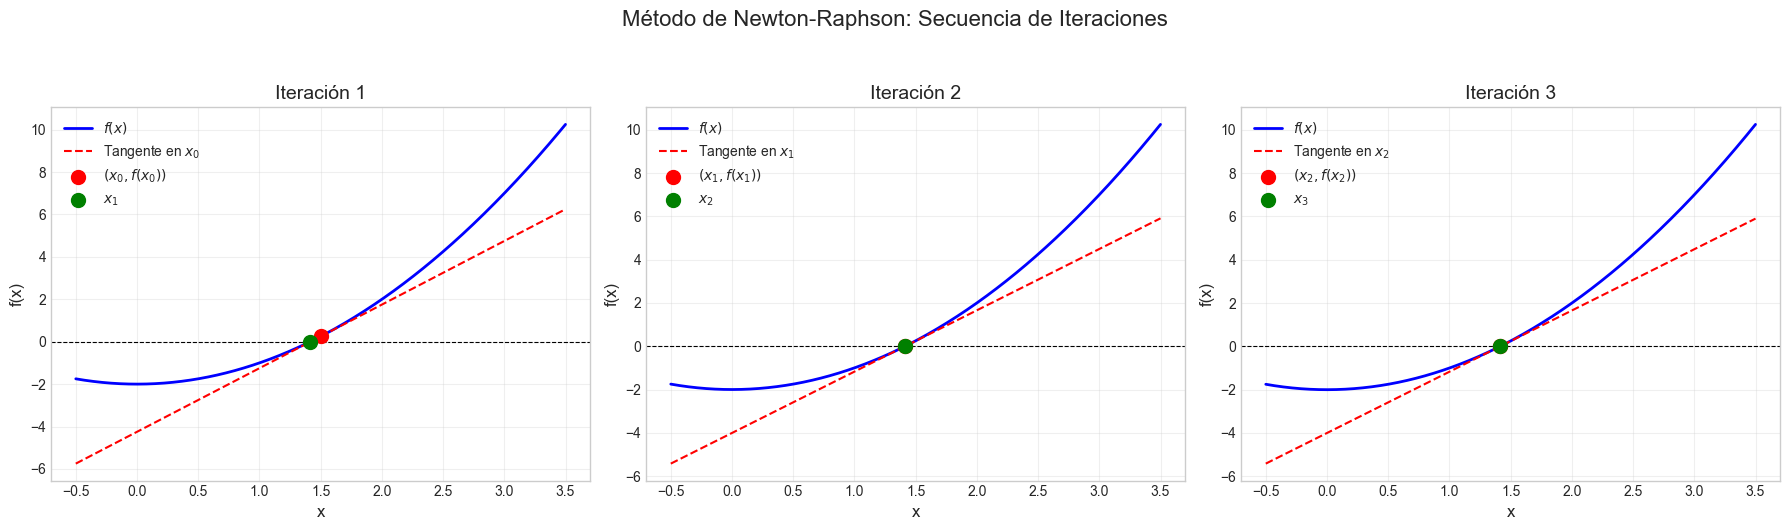


                       DESCRIPCIÓN DETALLADA DEL PROCESO                        

Iteración 1:
1. Valor actual: x_0 = 1.50000
2. Evaluación: f(x_0) = 0.25000
3. Pendiente: f'(x_0) = 3.00000
4. Nueva aproximación: x_1 = x_0 - f(x_0)/f'(x_0) = 1.41667
5. Error absoluto: |x_1 - x_0| = 0.08333

------------------------------------------------------------
Iteración 2:
1. Valor actual: x_1 = 1.41667
2. Evaluación: f(x_1) = 0.00694
3. Pendiente: f'(x_1) = 2.83333
4. Nueva aproximación: x_2 = x_1 - f(x_1)/f'(x_1) = 1.41422
5. Error absoluto: |x_2 - x_1| = 0.00245

------------------------------------------------------------
Iteración 3:
1. Valor actual: x_2 = 1.41422
2. Evaluación: f(x_2) = 0.00001
3. Pendiente: f'(x_2) = 2.82843
4. Nueva aproximación: x_3 = x_2 - f(x_2)/f'(x_2) = 1.41421
5. Error absoluto: |x_3 - x_2| = 0.00000

------------------------------------------------------------

                         TABLA DE RESULTADOS NUMÉRICOS                          

 Iteración     x_n  f

In [1]:

# Uso básico:
>>> from newton_teaching import newton_raphson_analysis
>>> f = lambda x: x**2 - 2
>>> df = lambda x: 2*x
>>> newton_raphson_analysis(f, df, 1.5)



In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable

def newton_raphson_analysis(f: Callable[[float], float], 
                          df: Callable[[float], float], 
                          x0: float) -> None:
    """
    Realiza un análisis completo del método de Newton-Raphson para enseñanza.
    
    Muestra gráficamente las primeras tres iteraciones del método, junto con:
    - Descripciones detalladas del proceso
    - Tabla con valores numéricos
    - Código de ejemplo para implementación
    
    Args:
        f (function): Función para la cual se busca la raíz
        df (function): Derivada de la función f
        x0 (float): Aproximación inicial
    
    Returns:
        None: Muestra los resultados gráficos e imprime información
    """
    # Configuración inicial
    iteraciones = 3
    historia = []
    x_vals = np.linspace(x0 - 2, x0 + 2, 500)
    
    # Configuración de gráficos
    plt.style.use('seaborn-whitegrid')
    fig, axes = plt.subplots(1, iteraciones, figsize=(18, 5))
    
    # Proceso iterativo
    for i in range(iteraciones):
        # Cálculo de Newton-Raphson
        x1 = x0 - f(x0) / df(x0)
        historia.append((i + 1, x0, f(x0), x1))
        
        # Configuración del subplot
        ax = axes[i]
        
        # Graficar función y eje x
        ax.plot(x_vals, f(x_vals), label='$f(x)$', color='blue', linewidth=2)
        ax.axhline(0, color='black', linestyle='--', linewidth=0.8)
        
        # Graficar tangente
        tangent = f(x0) + df(x0) * (x_vals - x0)
        ax.plot(x_vals, tangent, label=f'Tangente en $x_{i}$', 
               color='red', linestyle='--', linewidth=1.5)
        
        # Puntos importantes
        ax.scatter([x0], [f(x0)], color='red', s=100, 
                  label=f'$(x_{i}, f(x_{i}))$', zorder=5)
        ax.scatter([x1], [0], color='green', s=100, 
                  label=f'$x_{i+1}$', zorder=5)
        
        # Anotaciones y estilo
        ax.set_title(f'Iteración {i + 1}', fontsize=14)
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.set_xlabel('x', fontsize=12)
        ax.set_ylabel('f(x)', fontsize=12)
        
        # Actualizar para siguiente iteración
        x0 = x1
    
    # Título general y mostrar gráficos
    plt.suptitle('Método de Newton-Raphson: Secuencia de Iteraciones', 
                fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()
    
    # Generar descripción verbal
    _print_verbal_description(historia)
    
    # Mostrar tabla de resultados
    _print_results_table(historia)
    
    # Mostrar código de ejemplo
    _print_example_code()

def _print_verbal_description(history: list) -> None:
    """Genera y muestra una descripción verbal del proceso"""
    print("\n" + "="*80)
    print("DESCRIPCIÓN DETALLADA DEL PROCESO".center(80))
    print("="*80 + "\n")
    
    for i, (n, x_prev, fx_prev, x_next) in enumerate(history):
        print(f"Iteración {n}:")
        print(f"1. Valor actual: x_{n-1} = {x_prev:.5f}")
        print(f"2. Evaluación: f(x_{n-1}) = {fx_prev:.5f}")
        print(f"3. Pendiente: f'(x_{n-1}) = {(fx_prev / (x_prev - x_next)):.5f}")
        print(f"4. Nueva aproximación: x_{n} = x_{n-1} - f(x_{n-1})/f'(x_{n-1}) = {x_next:.5f}")
        print(f"5. Error absoluto: |x_{n} - x_{n-1}| = {abs(x_next - x_prev):.5f}\n")
        print("-"*60)

def _print_results_table(history: list) -> None:
    """Genera y muestra una tabla con los resultados numéricos"""
    print("\n" + "="*80)
    print("TABLA DE RESULTADOS NUMÉRICOS".center(80))
    print("="*80 + "\n")
    
    df = pd.DataFrame(history, columns=['Iteración', 'x_n', 'f(x_n)', 'x_n+1'])
    df['Error'] = df['x_n+1'] - df['x_n']
    print(df.to_string(index=False, float_format="%.5f"))

def _print_example_code() -> None:
    """Muestra código de ejemplo para implementar el método"""
    print("\n" + "="*80)
    print("CÓDIGO DE EJEMPLO".center(80))
    print("="*80 + "\n")
    
    code = """# Implementación básica del método de Newton-Raphson
import numpy as np
import matplotlib.pyplot as plt

def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    \"\"\"
    Implementación del método de Newton-Raphson para encontrar raíces.
    
    Parámetros:
        f: Función a evaluar
        df: Derivada de la función
        x0: Aproximación inicial
        tol: Tolerancia para convergencia
        max_iter: Número máximo de iteraciones
        
    Retorna:
        Tupla con (raíz aproximada, historia de iteraciones)
    \"\"\"
    historia = []
    for i in range(max_iter):
        fx = f(x0)
        dfx = df(x0)
        x1 = x0 - fx/dfx
        historia.append((i, x0, fx, x1))
        
        if abs(x1 - x0) < tol:
            return x1, historia
            
        x0 = x1
    
    raise ValueError("El método no convergió en el número máximo de iteraciones")
if __name__ == "__main__":
    # Ejemplo de uso del módulo
    ejemplo_funcion = lambda x: x**3 - 2*x - 5
    ejemplo_derivada = lambda x: 3*x**2 - 2
    newton_raphson_analysis(ejemplo_funcion, ejemplo_derivada, 2.0)"""


In [ ]:

# Ejemplo de uso:
# f = lambda x: x**2 - 2  # Función cuya raíz queremos encontrar
# df = lambda x: 2*x       # Derivada
# root, history = newton_raphson(f, df, 1.5)
# print(f"Raíz aproximada: {root}")
"""


In [ ]:
    print(code)





## Características del Módulo

1. **Documentación completa**: Incluye docstrings detallados y comentarios
2. **Visualización mejorada**:
   - Gráficos con estilo profesional
   - Anotaciones claras
   - Subplots para cada iteración

3. **Salidas educativas**:
   - Descripción verbal paso a paso
   - Tabla de resultados numéricos
   - Código de ejemplo implementable

4. **Buenas prácticas**:
   - Tipado de funciones (type hints)
   - Separación de preocupaciones
   - Funciones auxiliares privadas

5. **Ejemplo incluido**: Puede ejecutarse directamente para demostración

## Uso en la Enseñanza

Este módulo puede usarse para:
- Explicaciones en clase
- Material de laboratorio
- Autoaprendizaje
- Como base para proyectos estudiantiles

Los estudiantes pueden:
1. Analizar los gráficos generados
2. Seguir el proceso con la descripción verbal
3. Verificar cálculos con la tabla numérica
4. Implementar su propia versión basada en el código ejemplo